<a href="https://colab.research.google.com/github/evan01210/Machine-Learning-in-Action/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 云端 代码运行


## COMP


Cell(10,000; 1,000)

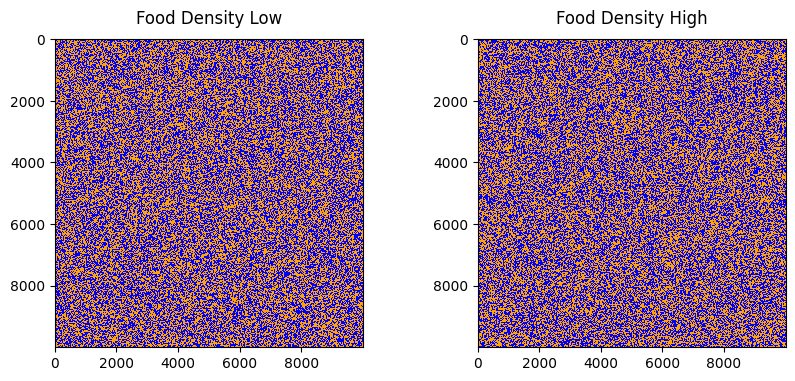

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
import random


class GenderCA:
    def __init__(self, size, prob_male, food_density):
        self.size = size
        self.grid = np.random.choice([0, 1], size=(size, size), p=[1 - prob_male, prob_male])
        self.food_density = food_density

    def update(self):
        new_grid = self.grid.copy()
        for i in range(self.size):
            for j in range(self.size):
                neighbors = self.get_neighbors(i, j)
                food_available = random.random() < self.food_density

                if self.grid[i, j] == 0 and 1 in neighbors and food_available:
                    if random.random() < 0.3:
                        new_grid[i, j] = 1
                elif self.grid[i, j] == 1 and 0 in neighbors and food_available:
                    if random.random() < 0.3:
                        new_grid[i, j] = 0

        self.grid = new_grid

    def get_neighbors(self, i, j):
        neighbors = []
        for x in range(i - 1, i + 2):
            for y in range(j - 1, j + 2):
                if 0 <= x < self.size and 0 <= y < self.size and (x, y) != (i, j):
                    neighbors.append(self.grid[x, y])
        return neighbors

    def calculate_male_ratio(self):
        total_males = np.sum(self.grid)
        total_population = self.size * self.size
        male_ratio = total_males / total_population
        return male_ratio


# 创建元胞自动机对象
size = 10000
prob_male = 0.5
food_density_low = 0.3  # 食物少
food_density_high = 0.7  # 食物多

ca_low_food = GenderCA(size, prob_male, food_density_low)
ca_high_food = GenderCA(size, prob_male, food_density_high)

# 设置动画参数
generations = 1000
print_interval = 100  # 打印间隔
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
cmap = mcolors.ListedColormap(['orange', 'blue'])
img_low_food = ax[0].imshow(ca_low_food.grid, cmap=cmap, interpolation='none')
img_high_food = ax[1].imshow(ca_high_food.grid, cmap=cmap, interpolation='none')

# 在图中添加标注
ax[0].text(0.5, 1.05, 'Food Density Low', size=12, ha='center', transform=ax[0].transAxes)
ax[1].text(0.5, 1.05, 'Food Density High', size=12, ha='center', transform=ax[1].transAxes)

# 更新函数，用于动画生成
def update(frame):
    ca_low_food.update()
    ca_high_food.update()

    img_low_food.set_array(ca_low_food.grid)
    img_high_food.set_array(ca_high_food.grid)

    # 每隔10代打印一次雄性占比
    if (frame + 1) % print_interval == 0:
        male_ratio_low_food = ca_low_food.calculate_male_ratio()
        male_ratio_high_food = ca_high_food.calculate_male_ratio()
        print(f"Generation {frame + 1}: Male Ratio - Low Food: {male_ratio_low_food:.2%}, High Food: {male_ratio_high_food:.2%}")

    # 如果是最后一代，停止动画
    if frame == generations - 1:
        ani.event_source.stop()

    return [img_low_food, img_high_food]

# 生成动画
ani = FuncAnimation(fig, update, frames=generations, blit=True)
plt.show()


Cell(1,000; 100)


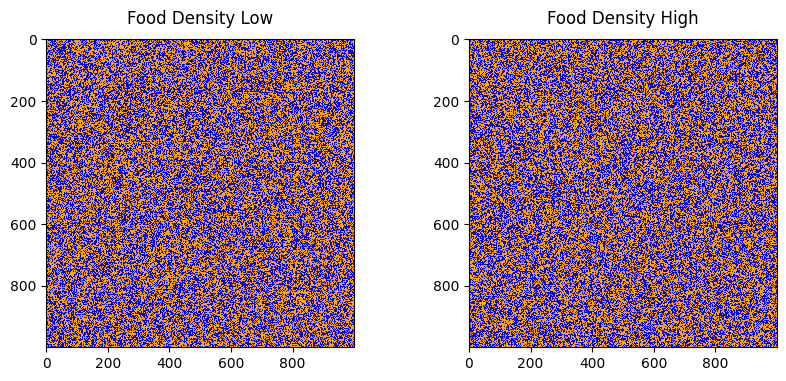

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
import random


class GenderCA:
    def __init__(self, size, prob_male, food_density):
        self.size = size
        self.grid = np.random.choice([0, 1], size=(size, size), p=[1 - prob_male, prob_male])
        self.food_density = food_density

    def update(self):
        new_grid = self.grid.copy()
        for i in range(self.size):
            for j in range(self.size):
                neighbors = self.get_neighbors(i, j)
                food_available = random.random() < self.food_density

                if self.grid[i, j] == 0 and 1 in neighbors and food_available:
                    if random.random() < 0.3:
                        new_grid[i, j] = 1
                elif self.grid[i, j] == 1 and 0 in neighbors and food_available:
                    if random.random() < 0.3:
                        new_grid[i, j] = 0

        self.grid = new_grid

    def get_neighbors(self, i, j):
        neighbors = []
        for x in range(i - 1, i + 2):
            for y in range(j - 1, j + 2):
                if 0 <= x < self.size and 0 <= y < self.size and (x, y) != (i, j):
                    neighbors.append(self.grid[x, y])
        return neighbors

    def calculate_male_ratio(self):
        total_males = np.sum(self.grid)
        total_population = self.size * self.size
        male_ratio = total_males / total_population
        return male_ratio


# 创建元胞自动机对象
size = 1000
prob_male = 0.5
food_density_low = 0.3  # 食物少
food_density_high = 0.7  # 食物多

ca_low_food = GenderCA(size, prob_male, food_density_low)
ca_high_food = GenderCA(size, prob_male, food_density_high)

# 设置动画参数
generations = 100
print_interval = 100  # 打印间隔
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
cmap = mcolors.ListedColormap(['orange', 'blue'])
img_low_food = ax[0].imshow(ca_low_food.grid, cmap=cmap, interpolation='none')
img_high_food = ax[1].imshow(ca_high_food.grid, cmap=cmap, interpolation='none')

# 在图中添加标注
ax[0].text(0.5, 1.05, 'Food Density Low', size=12, ha='center', transform=ax[0].transAxes)
ax[1].text(0.5, 1.05, 'Food Density High', size=12, ha='center', transform=ax[1].transAxes)

# 更新函数，用于动画生成
def update(frame):
    ca_low_food.update()
    ca_high_food.update()

    img_low_food.set_array(ca_low_food.grid)
    img_high_food.set_array(ca_high_food.grid)

    # 每隔10代打印一次雄性占比
    if (frame + 1) % print_interval == 0:
        male_ratio_low_food = ca_low_food.calculate_male_ratio()
        male_ratio_high_food = ca_high_food.calculate_male_ratio()
        print(f"Generation {frame + 1}: Male Ratio - Low Food: {male_ratio_low_food:.2%}, High Food: {male_ratio_high_food:.2%}")

    # 如果是最后一代，停止动画
    if frame == generations - 1:
        ani.event_source.stop()

    return [img_low_food, img_high_food]

# 生成动画
ani = FuncAnimation(fig, update, frames=generations, blit=True)
plt.show()
